# Analysis of Belle2 Data

In [1]:
import os, sys, pprint
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
!ls -l ../DATA/
!pwd

total 56352
-rwxr--r--  1 philipp philipp   584128 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_ccbar_0.root
-rwxr--r--  1 philipp philipp   117621 May 14 14:58 B0_etapr-eta-gg2pi_KS-pi+pi-_output_charged_17.root
-rwxr--r--  1 philipp philipp   155084 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_0.root
-rwxr--r--  1 philipp philipp   177149 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_1.root
-rwxr--r--  1 philipp philipp   183977 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_2.root
-rwxr--r--  1 philipp philipp   176779 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_3.root
-rwxr--r--  1 philipp philipp   185028 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_4.root
-rwxr--r--  1 philipp philipp   141664 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_5.root
-rwxr--r--  1 philipp philipp   192110 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_6.root
-rwxr--r--  1 philipp philipp   179731 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_7.root

## 1. Reading and Prepairing Data

In [3]:
from root_pandas import read_root

path = '/home/philipp/Desktop/Project/DATA/'
SFiles = glob.glob(os.path.join(path, 'Signal/*.root'))
CFiles = glob.glob(os.path.join(path, 'Continuous/*.root'))
PFiles = glob.glob(os.path.join(path, 'Peaking/*.root'))

Full_Signal = pd.concat((read_root(f, 'B0') for f in SFiles))
Full_Signal = Full_Signal[Full_Signal['B0_isSignal']==1].reset_index(drop=True)
Full_Continuous = pd.concat((read_root(f, 'B0') for f in CFiles))
Full_Peaking = pd.concat((read_root(f, 'B0') for f in PFiles))

Welcome to JupyROOT 6.16/00


/home/philipp/anaconda3/envs/Belle/lib/python3.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.16.4 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)
/home/philipp/anaconda3/envs/Belle/lib/python3.7/site-packages/root_pandas/readwrite.py:320: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


In [4]:
# Several branches organized in categories

General = ['exp_no', 'run_no', 'evt_no', 'nCands', 'iCand']
Masses = ['B0_M', 'B0_ErrM', 'B0_SigM', 'B0_K_S0_M', 'B0_K_S0_ErrM', 'B0_K_S0_SigM', 'B0_etap_M', 'B0_etap_ErrM', 
          'B0_etap_SigM', 'B0_etap_eta_M', 'B0_etap_eta_ErrM', 'B0_etap_eta_SigM']
Kinetics = ['B0_P', 'B0_P4', 'B0_deltae', 'B0_mbc', 'B0_etap_P', 'B0_etap_P4', 
            'B0_etap_eta_P', 'B0_etap_eta_P4', 'B0_etap_eta_gamma0_P', 'B0_etap_eta_gamma0_P4',
            'B0_etap_eta_gamma1_P', 'B0_etap_eta_gamma1_P4', 'B0_etap_pi0_P', 'B0_etap_pi0_P4',
            'B0_etap_pi1_P', 'B0_etap_pi1_P4', 'B0_K_S0_P', 'B0_K_S0_P4']
Other_Kinetics = ['B0_deltae', 'B0_mbc']
Kinetics_Training = ['B0_P', 'B0_deltae', 'B0_mbc', 'B0_etap_P',   'B0_etap_eta_P', 'B0_etap_eta_gamma0_P',
            'B0_etap_eta_gamma1_P', 'B0_etap_pi0_P', 'B0_etap_pi1_P', 'B0_K_S0_P']
Kinetics_comp = ['B0_P', 'B0_P40', 'B0_P41', 'B0_P42', 'B0_P43', 'B0_deltae', 'B0_mbc',
                 'B0_etap_P', 'B0_etap_P40', 'B0_etap_P41', 'B0_etap_P42','B0_etap_P43','B0_etap_eta_P',
                 'B0_etap_eta_P40', 'B0_etap_eta_P41', 'B0_etap_eta_P42', 'B0_etap_eta_P43',
                 'B0_etap_eta_gamma0_P', 'B0_etap_eta_gamma0_P40', 'B0_etap_eta_gamma0_P41', 
                 'B0_etap_eta_gamma0_P42', 'B0_etap_eta_gamma0_P43', 'B0_etap_eta_gamma1_P', 'B0_etap_eta_gamma1_P40',
                 'B0_etap_eta_gamma1_P41', 'B0_etap_eta_gamma1_P42', 'B0_etap_eta_gamma1_P43', 'B0_etap_pi0_P',
                 'B0_etap_pi0_P40', 'B0_etap_pi0_P41', 'B0_etap_pi0_P42', 'B0_etap_pi0_P43', 'B0_etap_pi1_P',
                 'B0_etap_pi1_P40', 'B0_etap_pi1_P41', 'B0_etap_pi1_P42', 'B0_etap_pi1_P43', 'B0_K_S0_P',
                 'B0_K_S0_P40', 'B0_K_S0_P41', 'B0_K_S0_P42', 'B0_K_S0_P43']
FourMomenta = ['B0_P4', 'B0_etap_P4', 'B0_etap_eta_P4', 'B0_etap_eta_gamma0_P4', 'B0_etap_eta_gamma1_P4', 
            'B0_etap_pi0_P4', 'B0_etap_pi1_P4', 'B0_K_S0_P4']
DecayAngles = ['B0_decayAngle__bo0__bc', 'B0_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo0__bc',
               'B0_etap_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo2__bc']
Positions = ['B0_X', 'B0_ErrX', 'B0_Y', 'B0_ErrY', 'B0_Z', 'B0_ErrZ', 'B0_Rho',  
             'B0_etap_X', 'B0_etap_ErrX', 'B0_etap_Y', 'B0_etap_ErrY', 
             'B0_etap_Z', 'B0_etap_ErrZ', 'B0_etap_Rho',
             'B0_etap_eta_X', 'B0_etap_eta_ErrX', 'B0_etap_eta_Y',
             'B0_etap_eta_ErrY', 'B0_etap_eta_Z', 'B0_etap_eta_ErrZ', 'B0_etap_eta_Rho',
             'B0_etap_pi0_X', 'B0_etap_pi0_ErrX', 'B0_etap_pi0_Y', 'B0_etap_pi0_ErrY', 
             'B0_etap_pi0_Z', 'B0_etap_pi0_ErrZ', 'B0_etap_pi0_Rho', 
             'B0_etap_pi1_X', 'B0_etap_pi1_ErrX', 'B0_etap_pi1_Y', 'B0_etap_pi1_ErrY', 
             'B0_etap_pi1_Z', 'B0_etap_pi1_ErrZ', 'B0_etap_pi1_Rho', 
             'B0_K_S0_X', 'B0_K_S0_ErrX', 'B0_K_S0_Y', 'B0_K_S0_ErrY', 'B0_K_S0_Z',
             'B0_K_S0_ErrZ', 'B0_K_S0_Rho', 
             'B0_cosAngleBetweenMomentumAndVertexVector', 'B0_distance', 'B0_significanceOfDistance',
             'B0_dr', 'B0_etap_pi0_dr', 'B0_etap_pi1_dr', 'B0_K_S0_dr']
Vertex = ['B0_VtxPvalue', 'B0_VtxProd', 'B0_VtxProdCov', 'B0_etap_VtxPvalue', 'B0_etap_VtxProd', 'B0_etap_VtxProdCov',
          'B0_etap_eta_VtxPvalue', 'B0_etap_eta_VtxProd', 'B0_etap_VtxProdCov', 
          'B0_etap_pi0_VtxPvalue', 'B0_etap_pi0_VtxProd', 'B0_etap_pi0_VtxProdCov', 
          'B0_etap_pi1_VtxPvalue', 'B0_etap_pi1_VtxProd', 'B0_etap_pi1_VtxProdCov', 
          'B0_K_S0_VtxPvalue', 'B0_K_S0_VtxProd', 'B0_K_S0_VtxProdCov']
Vertex_Training = ['B0_VtxPvalue', 'B0_etap_VtxPvalue', 'B0_etap_eta_VtxPvalue', 'B0_etap_pi0_VtxPvalue',
                   'B0_etap_pi1_VtxPvalue', 'B0_K_S0_VtxPvalue', ]
Continuum_Suppression = ['B0_CSMVA', 'B0_TrCSMVA']
Continuum_Suppression_Training = ['B0_TrCSMVA']


Filter = Masses + Kinetics + DecayAngles + Positions + Vertex + Continuum_Suppression
#Training = Masses + Kinetics_Training + DecayAngles + Positions + Vertex_Training + Continuum_Suppression_Training

In [5]:
Branches = []
MC_Branches = []
Data_Branches = []
Kinetics_CMS = []
MC_Keywords = ['True', 'Truth', 'isRight', 'isSignal', 'isContinuum', 
               'isNotContinuum', 'MC', 'mc']

# Deciding which branches are MonteCarlo and which are not
for Branch in Full_Signal.columns : 
    MC = False 
    Branches.append(Branch)
    for key in MC_Keywords : 
        if key in Branch :  MC = True
    if MC==True : MC_Branches.append(Branch)
    else :  Data_Branches.append(Branch)

# All Data Branches excluding the unphysical ones (such as evt_no, etc)
Data_Branches = [b for b in Data_Branches if not b in General]
Arrays = []
for Branch in Data_Branches : 
    #print(type(Full_Signal[Branch][0]))
    if (type(Full_Signal[Branch][0]) is np.ndarray) : Arrays.append(Branch)
Data_Branches = [b for b in Data_Branches if not b in Arrays]

# Finding the CMS Kinetics
for Branch in Data_Branches : 
    if 'cms' in Branch : Kinetics_CMS.append(Branch)

for Branch in Data_Branches: 
    #print (Branch)
    pass
    
print (Kinetics_CMS)

['B0_Pcms', 'B0_etap_Pcms', 'B0_etap_eta_Pcms', 'B0_etap_eta_gamma0_Pcms', 'B0_etap_eta_gamma1_Pcms', 'B0_etap_pi0_Pcms', 'B0_etap_pi1_Pcms', 'B0_K_S0_Pcms']


In [6]:
Training = Kinetics_CMS + Masses + Other_Kinetics + Continuum_Suppression_Training + Positions + DecayAngles + Vertex_Training

In [7]:
print (type(Full_Signal['B0_P4'][0]))
print (type(Full_Signal['B0_P'][0]))
print (type(Full_Signal['B0_isSignal'][0]))

<class 'numpy.ndarray'>
<class 'numpy.float32'>
<class 'numpy.float32'>


### Choosing the best candidates in each event

Combinatorics in the reconstruction process often leads to events with multiple candidates, where we carefully have to choose the best without introducing significant bias. To do this we have two possible methods: 

- Choosing the candidate with the reconstructed mass closest to the nominal value
- Choosing the candidate with the best vertex fit

If we were only using the mass we would bias our data towards a very narrow mass peak in cases where two candidates are close to the nominal value. Therefore I suggest using the masses for a generous cut (e.g. $5\sigma$) and then using vertex information to pick the best candidate. 

##### Masses
Nominal masses with errors in GeV $ [M_{nominal}, \sigma_{M_{nominal}}] $ according to the [Particle Data Group](http://pdg.lbl.gov/2019/listings/contents_listings.html)

In events with more than one candidate we can use this to perform a rough cut on candidates requirering, that 

$$ 
M_{reconstructed} \in 
    \left[ M_{nominal} - 5 \times \left( \sigma_{M_{nominal}} + \sigma_{M_{reconstructed}} \right), 
           M_{nominal} + 5 \times \left( \sigma_{M_{nominal}} + \sigma_{M_{reconstructed}} \right) \right]
$$



In [8]:
M_B0 = [5.27955, 0.00026]
M_K0 = [0.497611, 0.000013]
M_etap = [0.95778, 0.00006]
M_eta = [0.547862, 0.000017]

In [9]:
# Right now we don't use any pre-selection on our data. 
# If we did, this would be a reasonable approach

#Signal = Signal[abs(Signal['B0_M'] - M_B0[0]) < 5 * Signal['B0_ErrM']]
#Signal = Signal[abs(Signal['B0_K_S0_M'] - M_K0[0]) < 5 * Signal['B0_K_S0_ErrM']]
#Signal = Signal[abs(Signal['B0_etap_M'] - M_etap[0]) < 5 * Signal['B0_etap_ErrM']]
#Signal = Signal[abs(Signal['B0_etap_eta_M'] - M_eta[0]) < 5 * Signal['B0_etap_eta_ErrM']]

In [10]:
import matplotlib.pyplot as plt

num_bins = 50
n, bins, patches = plt.hist(Full_Signal['B0_M'], num_bins)
plt.xlabel('B0 mass in GeV')
plt.ylabel('N', rotation=180)
plt.axvline(x=M_B0[0], ymin=0, ymax=35000, color='r')
plt.show()

<Figure size 640x480 with 1 Axes>

##### Vertex

I need to take a closer look at the vertex information to decide how to use it

In [11]:
# Do stuff

#### Filtering the Signal and chosing variables to train
- We filter the Signal, as we are only interested in correctly reconstructed events
- We choose variables for the training
- We convert arrays to 4 variables

In [12]:
# This turns the array of the 4 momenta in separate variables. We don't use the 4 momentum anymore...
#for M in FourMomenta: 
#    Full_Signal[M+'0'], Full_Signal[M+'1'], Full_Signal[M+'2'], Full_Signal[M+'3'] = zip(*Full_Signal.pop(M))
#    Full_Continuous[M+'0'], Full_Continuous[M+'1'], Full_Continuous[M+'2'], Full_Continuous[M+'3'] = zip(*Full_Continuous.pop(M))
#    Full_Peaking[M+'0'], Full_Peaking[M+'1'], Full_Peaking[M+'2'], Full_Peaking[M+'3'] = zip(*Full_Peaking.pop(M))

In [13]:
Selection_Signal = Full_Signal[Training]
Selection_Continuous = Full_Continuous[Training]
Selection_Peaking = Full_Peaking[Training]

#Signal_comp = pd.concat([pd.DataFrame(Signal_Pure[c].tolist()).add_prefix(c[:c.index('4')]).add_suffix(c[c.index('4')+1:]) if '4' in c else Signal_Pure[c] for c in Signal_Pure], axis=1)
#Background_comp = pd.concat([pd.DataFrame(Background[c].tolist()).add_prefix(c[:c.index('4')]).add_suffix(c[c.index('4')+1:]) if '4' in c else Background[c] for c in Background], axis=1)

In [14]:
from IPython.display import display
pd.options.display.max_columns = None
display(Selection_Signal)

,B0_Pcms,B0_etap_Pcms,B0_etap_eta_Pcms,B0_etap_eta_gamma0_Pcms,B0_etap_eta_gamma1_Pcms,B0_etap_pi0_Pcms,B0_etap_pi1_Pcms,B0_K_S0_Pcms,B0_M,B0_ErrM,B0_SigM,B0_K_S0_M,B0_K_S0_ErrM,B0_K_S0_SigM,B0_etap_M,B0_etap_ErrM,B0_etap_SigM,B0_etap_eta_M,B0_etap_eta_ErrM,B0_etap_eta_SigM,B0_deltae,B0_mbc,B0_TrCSMVA,B0_X,B0_ErrX,B0_Y,B0_ErrY,B0_Z,B0_ErrZ,B0_Rho,B0_etap_X,B0_etap_ErrX,B0_etap_Y,B0_etap_ErrY,B0_etap_Z,B0_etap_ErrZ,B0_etap_Rho,B0_etap_eta_X,B0_etap_eta_ErrX,B0_etap_eta_Y,B0_etap_eta_ErrY,B0_etap_eta_Z,B0_etap_eta_ErrZ,B0_etap_eta_Rho,B0_etap_pi0_X,B0_etap_pi0_ErrX,B0_etap_pi0_Y,B0_etap_pi0_ErrY,B0_etap_pi0_Z,B0_etap_pi0_ErrZ,B0_etap_pi0_Rho,B0_etap_pi1_X,B0_etap_pi1_ErrX,B0_etap_pi1_Y,B0_etap_pi1_ErrY,B0_etap_pi1_Z,B0_etap_pi1_ErrZ,B0_etap_pi1_Rho,B0_K_S0_X,B0_K_S0_ErrX,B0_K_S0_Y,B0_K_S0_ErrY,B0_K_S0_Z,B0_K_S0_ErrZ,B0_K_S0_Rho,B0_cosAngleBetweenMomentumAndVertexVector,B0_distance,B0_significanceOfDistance,B0_dr,B0_etap_pi0_dr,B0_etap_pi1_dr,B0_K_S0_dr,B0_decayAngle__bo0__bc,B0_decayAngle__bo1__bc,B0_etap_decayAngle__bo0__bc,B0_etap_decayAngle__bo1__bc,B0_etap_decayAngle__bo2__bc,B0_VtxPvalue,B0_etap_VtxPvalue,B0_etap_eta_VtxPvalue,B0_etap_pi0_VtxPvalue,B0_etap_pi1_VtxPvalue,B0_K_S0_VtxPvalue
0,0.337742,2.715602,1.822239,1.143091,0.745460,0.619497,0.319340,2.387300,5.307438,0.015551,1.794601,0.497874,0.003358,0.077336,0.962908,0.002699,1.944490,0.542071,0.010025,-0.576791,0.028394,5.278986,-2.833126,-0.002149,0.001303,-1.066588e-09,0.000004,-0.014420,0.007413,0.002149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001742,0.004913,0.001482,0.004186,-0.009292,0.007839,0.002287,0.003826,0.011587,-0.000924,0.002779,-0.019859,0.012930,0.003936,-3.503684,0.056161,-8.044307,0.127328,-0.092195,0.085395,8.774205,-0.977685,0.014580,1.943959,0.002149,0.002287,0.003936,8.774205,0.488507,-0.488507,0.568254,0.079900,-0.670724,6.053036e-04,4.801615e-02,5.644614e-01,5.343583e-01,0.361941,6.989494e-03
1,0.470735,2.385937,1.143156,0.478281,0.661026,0.587081,0.784182,2.633921,5.229204,0.032386,-1.553946,0.490416,0.014302,-0.503305,0.977696,0.009197,2.178594,0.486767,0.011250,-5.429974,-0.039430,5.268792,0.227573,0.006748,0.001236,-2.922411e-09,0.000004,0.045094,0.006744,0.006748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006379,0.007717,-0.004306,0.005148,0.063782,0.012361,0.007697,0.000264,0.003745,0.000230,0.003256,0.034392,0.007308,0.000350,6.129555,0.255150,-7.030197,0.321926,16.094391,0.691816,9.327116,0.971280,0.045596,6.678820,0.006748,0.007697,0.000350,9.327117,-0.857668,0.857668,-0.527525,0.403934,0.673270,1.814637e-01,2.815941e-02,5.980884e-08,7.179064e-01,0.958767,9.333900e-01
2,0.374911,2.376649,1.349594,0.764921,0.606377,0.577851,0.491888,2.672966,5.267826,0.012465,-0.938999,0.497261,0.003568,-0.098962,0.957618,0.003712,-0.011401,0.508457,0.009905,-3.977389,-0.008629,5.276476,2.639780,0.003960,0.010152,1.343392e-10,0.000004,0.025814,0.066676,0.003960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.041917,0.046557,0.009388,0.010619,0.040045,0.180281,0.042955,-0.035149,0.040243,0.029613,0.034197,-0.151886,0.166653,0.045961,-0.766622,0.014066,-6.539565,0.072670,-0.810397,0.124342,6.584346,0.968860,0.026116,0.387239,0.003960,0.042955,0.045961,6.584347,0.203863,-0.203863,-0.212969,0.754136,-0.192931,4.248845e-01,9.994511e-01,7.340705e-05,5.041033e-01,0.522255,2.304620e-01
3,0.353012,2.354433,1.863505,1.432046,0.510540,0.356780,0.190075,2.666672,5.242138,0.017393,-2.149755,0.493500,0.011296,-0.364243,0.961774,0.003132,1.313378,0.547946,0.010651,0.008702,-0.035768,5.277987,0.562337,-0.018233,0.001563,-1.143547e-08,0.000004,-0.116448,0.009505,0.018233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.083225,0.007082,-0.036418,0.002565,-0.116987,0.010439,0.090844,-0.012136,0.020035,-0.000107,0.000108,0.073781,0.048236,0.012137,10.478592,0.485756,-22.969173,1.156161,2.622428,0.291536,25.246462,-0.972638,0.117867,12.262980,0.018233,0.090844,0.012137,25.246462,-0.089340,0.089340,0.806590,-0.218116,-

### Preprocessing the Data
1. Labelling the Data (0 for peaking background, 1 for continuous background and 2 for Signal)
2. Splitting it in train and test data
3. removing the label from testing
4. Scaling it and removing the mean

In [15]:
from random import seed
from random import randint
# seed random number generator
n_seed=1234
seed(n_seed)

In [16]:
Selection_Signal['Type'] = 2
Selection_Continuous['Type'] = 1
Selection_Peaking['Type'] = 0

/home/philipp/anaconda3/envs/Belle/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/philipp/anaconda3/envs/Belle/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/philipp/anaconda3/envs/Belle/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [17]:
from sklearn.model_selection import train_test_split

Sum_BS = pd.concat([Selection_Signal, Selection_Continuous, Selection_Peaking]).sample(frac=1)
X = Sum_BS.drop('Type',axis=1)
Y = Sum_BS['Type']
 
# We want to have 60% training, 20% testing and 20% validation
# X_Rest is created temporarily and then split into testing and validation
X_Train, X_Rest, Y_Train, Y_Rest = train_test_split(X, Y, train_size=0.6,random_state=randint(10**6,10**9))
X_Test, X_Validation, Y_Test, Y_Validation = train_test_split(X_Rest, Y_Rest, train_size=0.5,random_state=randint(10**6,10**9))

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
#print(ss.fit(X_Train))
X_Train = ss.fit_transform(X_Train)
X_Test = ss.transform(X_Test)
X_Validation = ss.transform(X_Validation)

In [24]:
from keras.utils import to_categorical

# uncomment, to use keras
# Y_Train, Y_Test = to_categorical(Y_Train, num_classes=3), to_categorical(Y_Test, num_classes=3)

Using TensorFlow backend.


### Principal Component Analysis to reduce the number of input parameters

Here we will try to perform a Principal Component Analysis (PCA) on some of the categories of branches to reduce the number of dimensionality where possible

11 variables explain 50% of the variance
36 variables explain 90% of the variance
42 variables explain 95% of the variance
50 variables explain 99% of the variance


Text(0,0.5,'Explained Variance')

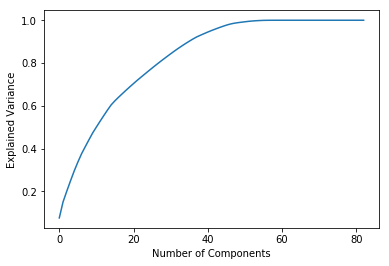

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(Training))
pcTrain = pd.DataFrame(data = pca.fit_transform(X_Train))
pcTest = pd.DataFrame(data = pca.transform(X_Test))
pcValidation = pd.DataFrame(data = pca.transform(X_Validation))

T50, T90, T95, T99, = False, False, False, False
for i in range(len(pca.explained_variance_ratio_)) : 
    if (sum(pca.explained_variance_ratio_[:i+1]) > 0.5 and T50 ==False) : 
        print(str(i+1) + ' variables explain 50% of the variance')
        T50 = True
        n_50 = i + 1 
    if (sum(pca.explained_variance_ratio_[:i+1]) > 0.9 and T90 ==False) : 
        print(str(i+1) + ' variables explain 90% of the variance')
        T90 = True
        n_90 = i + 1
    if (sum(pca.explained_variance_ratio_[:i+1]) > 0.95 and T95 ==False) : 
        print(str(i+1) + ' variables explain 95% of the variance')
        T95 = True
        n_95 = i + 1
    if (sum(pca.explained_variance_ratio_[:i+1]) > 0.99 and T99 ==False) : 
        print(str(i+1) + ' variables explain 99% of the variance')
        T99 = True
        n_99 = i + 1
        
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [21]:
# For input_dim chose n_50, n_90, n_95 or n_99 depending on how much explained variance we require
input_dim = n_99
pcTrain = pcTrain.iloc[:, 0:input_dim]
pcTest = pcTest.iloc[:, 0:input_dim]

pcTrain.shape

(272364, 50)

### Create a Neural Network with Scikit-Learn

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes': [(50, 50)],
              'solver': ['sgd', 'adam'],
              'learning_rate_init': [0.1, 0.01]
             }

mlp = MLPClassifier(max_iter=300, alpha=1e-4,
                    tol=1e-4, random_state=n_seed)

clf = GridSearchCV(mlp, param_grid=parameters, verbose=2, cv=5, return_train_score=True)
clf.fit(X_Train, Y_Train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=sgd .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=sgd, total= 1.4min
[CV] hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=sgd .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV]  hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=sgd, total= 1.5min
[CV] hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=sgd .
[CV]  hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=sgd, total= 1.7min
[CV] hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=sgd .
[CV]  hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=sgd, total= 1.3min
[CV] hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=sgd .
[CV]  hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=sgd, total= 1.2min
[CV] hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=adam 
[CV]  hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=adam, total=  15.1s
[CV] hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=adam 
[CV]  hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=adam, total= 2.8min
[CV] hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver=adam 
[CV]  hidden_layer_sizes=(50, 50), learning_rate_init=0.1, sol

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 53.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=300,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1234, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'hidden_layer_sizes': [(50, 50)],
       

In [28]:
scores=pd.DataFrame(clf.cv_results_)
print(scores)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      85.280557     10.770610         0.075824        0.007806   
1      46.170783     61.821552         0.228844        0.338404   
2     292.531574     22.500599         0.088336        0.009667   
3     210.378979     47.499543         0.362529        0.019945   

  param_hidden_layer_sizes param_learning_rate_init param_solver  \
0                 (50, 50)                      0.1          sgd   
1                 (50, 50)                      0.1         adam   
2                 (50, 50)                     0.01          sgd   
3                 (50, 50)                     0.01         adam   

                                              params  split0_test_score  \
0  {'hidden_layer_sizes': (50, 50), 'learning_rat...           0.985810   
1  {'hidden_layer_sizes': (50, 50), 'learning_rat...           0.511657   
2  {'hidden_layer_sizes': (50, 50), 'learning_rat...           0.984470   
3  {'hidden_layer_sizes

## Create the Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_model():
    activation = 'relu'
    dropout_rate = 0.2
    init_mode = 'uniform'
    weight_constraint = 0
    optimizer = 'adam'
    lr = 0.01
    momentum = 0
    
    model = Sequential()
    model.add(Dense(30, input_dim=input_dim, activation=activation, 
                    kernel_initializer=init_mode,))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, kernel_initializer=init_mode, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
activation = ['relu', 'sigmoid', 'tanh']
momentum = [0.0, 0.2, 0.4, 0.6]
dropout_rate = [0.0, 0.2, 0.4]
neurons = [5, 10, 20, 40]
learn_rate = [0.001, 0.01, 0.1, 0.3]
weight_constraint = [1, 3, 5]
init = ['uniform']
optimizer = ['SGD', 'Adam']
epochs = [2, 5, 10]
batch_size = [100, 1000, 10000]

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, batch_size=1000, epochs=10)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(pcTrain, Y_Train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with %r" % (mean, stdev, param))

#### Results from GridSearch

- Model becomes unstable after 3-5 epochs, loss -> nan
- Smaller batch_size gives more accurate results (1e2 vs 1e3 vs 1e4) within the same amount of epochs


The unstability after 3-5 epochs is something, that has to be fixed!

### Evaluate Model